[nltk_data] Downloading package punkt to
[nltk_data]     /Users/robinwoodfamily/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robinwoodfamily/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/6_/x10j3qv524qdjmnwk9l24_940000gn/T/ipykernel_6781/1850657266.py:183: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


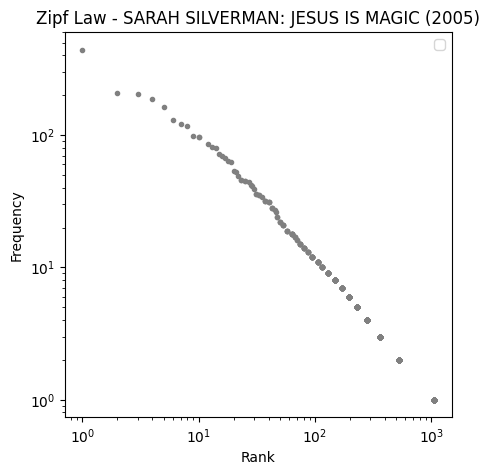

Total words: 11237
Total words: 12406
Total words: 11386
Total words: 10342
Total words: 12432
Total words: 12270
Total words: 13330
Total words: 7163
Total words: 10631
Total words: 12771
Total words: 9171
Total words: 8756
Total words: 10816
Total words: 10046
Total words: 9088
Total words: 4329
Total words: 8019
Total words: 8068
Total words: 12083
Total words: 7635
Total words: 9449
Total words: 8808
Total words: 6413
Total words: 8087
Total words: 8364
Total words: 9824
Total words: 5880
Total words: 7540
Total words: 7932
Total words: 9047
Total words: 9713
Total words: 11827
Total words: 8330
Total words: 6922
Total words: 13771
Total words: 10114
Total words: 8817
Total words: 5824
Total words: 7586
Total words: 10155
Total words: 6595
Total words: 6992
Total words: 8111
Total words: 5822
Total words: 7253
Total words: 8552
Total words: 9315
Total words: 9268
Total words: 10598
Total words: 11547


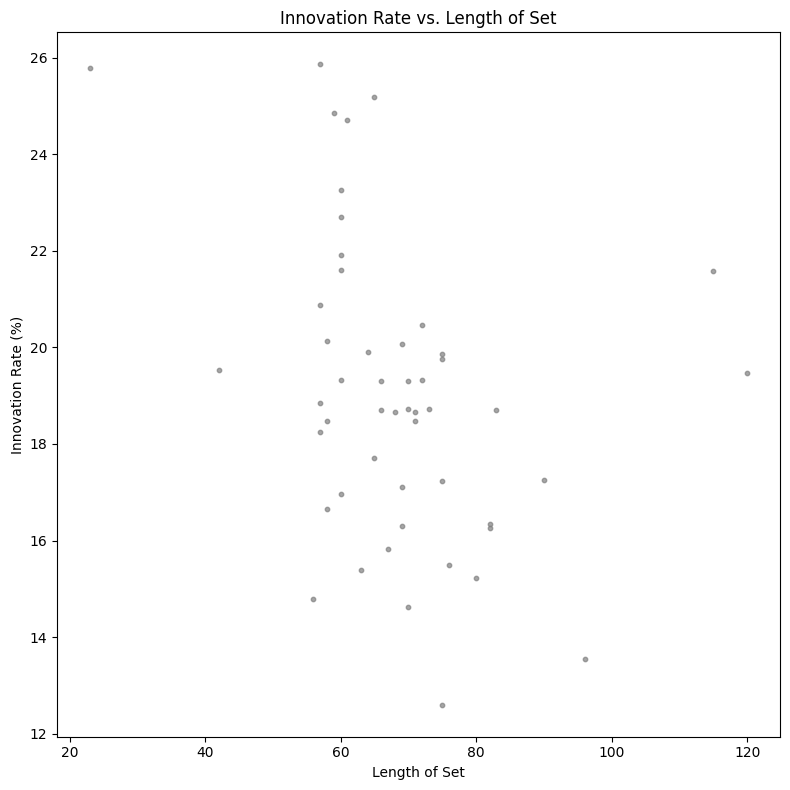

Total words: 11237
Total words: 12406
Total words: 11386
Total words: 10342
Total words: 12432
Total words: 12270
Total words: 13330
Total words: 7163
Total words: 10631
Total words: 12771
Total words: 9171
Total words: 8756
Total words: 10816
Total words: 10046
Total words: 9088
Total words: 4329
Total words: 8019
Total words: 8068
Total words: 12083
Total words: 7635
Total words: 9449
Total words: 8808
Total words: 6413
Total words: 8087
Total words: 8364
Total words: 9824
Total words: 5880
Total words: 7540
Total words: 7932
Total words: 9047
Total words: 9713
Total words: 11827
Total words: 8330
Total words: 6922
Total words: 13771
Total words: 10114
Total words: 8817
Total words: 5824
Total words: 7586
Total words: 10155
Total words: 6595
Total words: 6992
Total words: 8111
Total words: 5822
Total words: 7253
Total words: 8552
Total words: 9315
Total words: 9268
Total words: 10598
Total words: 11547


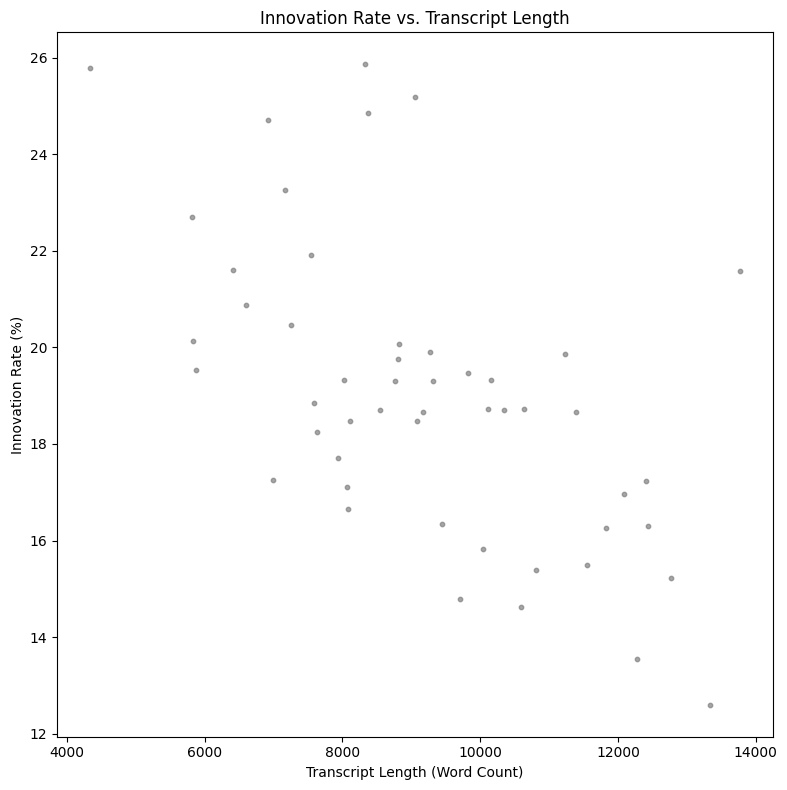

       word  counts     probs  total_unique
0         I     241  0.055671          1116
1         a     171  0.039501          1116
2       the     123  0.028413          1116
3        to     122  0.028182          1116
4       you      79  0.018249          1116
..      ...     ...       ...           ...
95   comedy       7  0.001617          1116
96  Hedberg       7  0.001617          1116
97      now       7  0.001617          1116
98     over       7  0.001617          1116
99     need       7  0.001617          1116

[100 rows x 4 columns]
Total words: 4329
0.2577962577962578
    word  counts     probs  total_unique
0      I     443  0.061078          1484
1    you     208  0.028678          1484
2      a     205  0.028264          1484
3     it     187  0.025782          1484
4    the     164  0.022611          1484
5   know     131  0.018061          1484
6     to     121  0.016683          1484
7   that     117  0.016131          1484
8    And      99  0.013650          1484
9

In [210]:
import re
import pandas as pd
import requests
import json
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer,TweetTokenizer
from nltk.corpus import stopwords
from nltk import download
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

download('punkt')
download('stopwords')

url = 'https://raw.githubusercontent.com/marobinette/pocs/main/project/comedy_data_10_31.csv'

df = pd.read_csv(url)
df = df[['title', 'length', 'transcript']]

def trimTitle(title):
    trimmedTitle = title.split('–')[0]
    # remove whitespace at the end
    trimmedTitle = trimmedTitle.rstrip()
    return trimmedTitle

# apply trimTitle to the title column
df['title'] = df['title'].apply(trimTitle)  

def export_comedian_word_data(word_data, comedian):
    """
    Exports the word data for a specific comedian to a CSV file.
    
    Parameters:
    - word_data (DataFrame): DataFrame containing words, counts, total unique words, and probabilities.
    - comedian (str): Name of the comedian to label the CSV file.
    """
    word_data = word_data.rename(columns={'word': 'types'})
    word_data = word_data[['types', 'counts', 'total_unique', 'probs']]    
    filename = f"{comedian}.csv"
    word_data.to_csv(filename, index=False)
    print(f"Data exported to {filename} successfully.")

def get_word_data(words):
    """
    Generates word frequency data including counts and probabilities.
    
    Parameters:
    - words (list): List of words to analyze for frequency and probability.
    
    Returns:
    - DataFrame: DataFrame with word counts, probabilities, and total unique word count.
    """
    word_data = pd.Series(words).value_counts().reset_index()
    word_data.columns = ['word', 'counts']        
    word_data['probs'] = word_data['counts'] / word_data['counts'].sum()    
    word_data['total_unique'] = len(word_data)
    word_data = word_data.sort_values(by='counts', ascending=False).reset_index(drop=True)
    
    return word_data

def tokenize_words(text, remove_stop_words=False):
    """
    Tokenizes the text into words, with an option to remove stopwords.

    Parameters:
    - text (str or list): Text or list of strings to tokenize.
    - remove_stop_words (bool): Whether to remove stopwords from the tokens.

    Returns:
    - list: List of tokenized words.
    """
    if isinstance(text, list):
        text = ' '.join(text)

    # Tokenize text while preserving contractions.
    words = word_tokenize(text)

    # Remove all words in brackets or punctuation.
    tokenizer = TweetTokenizer()
    words = tokenizer.tokenize(text)
    words = [re.sub(r"[^\w\s]", '', word) for word in words]

    # Filter out empty strings resulting from punctuation removal.
    words = [word for word in words if word]

    # Remove one-letter words except "I", "a", or "A"
    words = [word for word in words if len(word) > 1 or word in ['I', 'a', 'A']]

    # remove instances of "nI"
    words = [word for word in words if word != 'nI']
    # Remove stopwords if the option is selected.
    if remove_stop_words:
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word.lower() not in stop_words]

    return words


def calculate_innovation_rate(words):
    """
    Calculates the innovation rate as the ratio of unique words to the total words.
    
    Parameters:
    - words (list): List of tokenized words.
    
    Returns:
    - float: Innovation rate.
    """
    unique_words = set(words)
    # print(f"Unique words: {len(unique_words)}")
    total_words = len(words)
    print(f"Total words: {total_words}")
    # print(f"Total words: {total_words}")
    innovation_rate = len(unique_words) / total_words if total_words > 0 else 0
    return innovation_rate

def get_innovation_rate_data(df):
    """
    Returns a DataFrame with title, innovation rate, and length of set for each comedian.
    """
    titles = []
    lengths = []  # Renamed to avoid overwriting
    innovation_rates = []

    for idx, row in df.iterrows():
        title = row['title']
        length = row['length']  # Length of the set
        transcript = row['transcript']
        
        words = tokenize_words(transcript, remove_stop_words=False)
        innovation_rate = calculate_innovation_rate(words) * 100  # Convert to percentage
        
        # Append data to lists
        titles.append(title)
        lengths.append(length)
        innovation_rates.append(innovation_rate)
    
    # Create a new DataFrame with title, length, and innovation_rate columns
    innovation_rate_df = pd.DataFrame({
        'title': titles,
        'length': lengths,  # Corrected list name here
        'innovation_rate': innovation_rates
    })

    return innovation_rate_df


def plot_zipf_distribution(df, title):
    """
    Plots the Zipf distribution for the given comedian's transcript.
    
    Parameters:
    - df (DataFrame): DataFrame containing comedy data with titles and transcripts.
    - title (str): The comedian's name for which to plot the distribution.
    """
    # Filter the dataframe for the given comedian
    transcript = df[df['title'] == title]['transcript'].values[0]
    
    # Tokenize the words
    words = tokenize_words(transcript, remove_stop_words=False)
    
    # Generate word frequency data
    word_data = get_word_data(words)
    
    # Rank the words by frequency
    word_data['rank'] = word_data['counts'].rank(ascending=False, method='average').astype(int)
    
    # Log-transform rank and frequency
    log_rank = np.log10(word_data['rank'])
    log_freq = np.log10(word_data['counts'])
    
    # Perform linear regression to calculate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
    
    # Plot the Zipf distribution (log-log scale)
    plt.figure(figsize=(5, 5))
    plt.loglog(word_data['rank'], word_data['counts'], marker=".", linestyle='none', color="grey")
    
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf Law - {title}')
    plt.legend()
    plt.savefig(f"{title}_zipf_log_space.png")
    plt.show()

def plot_innovation_rate(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['length'], df['innovation_rate'], s=10, color='grey', alpha=0.7)
    plt.xlabel('Length of Set')
    plt.ylabel('Innovation Rate (%)')
    plt.title('Innovation Rate vs. Length of Set')
    plt.tight_layout()
    plt.savefig('Innovation_Rate_Length_Set.png')
    plt.show()

def get_innovation_rate_data_with_word_count(df):
    """
    Returns a DataFrame with title, innovation rate, and word count of each comedian's set.
    """
    titles = []
    word_counts = []
    innovation_rates = []

    for idx, row in df.iterrows():
        title = row['title']
        transcript = row['transcript']
        
        words = tokenize_words(transcript, remove_stop_words=False)
        word_count = len(words)
        innovation_rate = calculate_innovation_rate(words) * 100  # Convert to percentage
        
        # Append data to lists
        titles.append(title)
        word_counts.append(word_count)
        innovation_rates.append(innovation_rate)
    
    # Create a new DataFrame with title, word_count, and innovation_rate columns
    innovation_rate_df = pd.DataFrame({
        'title': titles,
        'word_count': word_counts,
        'innovation_rate': innovation_rates
    })

    return innovation_rate_df

def plot_innovation_rate_by_word_count(df):
    """
    Plots innovation rate against the number of words in each transcript.
    
    Parameters:
    - df (DataFrame): DataFrame containing title, word_count, and innovation_rate.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['word_count'], df['innovation_rate'],  s=10, color='grey', alpha=0.7)
    plt.xlabel('Transcript Length (Word Count)')
    plt.ylabel('Innovation Rate (%)')
    plt.title('Innovation Rate vs. Transcript Length')
    plt.tight_layout()
    plt.savefig('Innovation_Rate_Length_Corpus.png')
    plt.show()

def calculate_vocabulary_growth(words):
    """
    Calculates vocabulary size as a function of word count for a given transcript.
    Returns a list of tuples where each tuple contains the count of words and unique words.
    """
    vocab_growth = []
    unique_words = set()
    for i, word in enumerate(words, 1):
        unique_words.add(word)
        vocab_growth.append((i, len(unique_words)))
    return np.array(vocab_growth)

def plot_heaps_law(df, title):
    """Plots Heaps' Law based on vocabulary growth for a single comedy set."""
    transcript = df[df['title'] == title]['transcript'].values[0]
    words = tokenize_words(transcript, remove_stop_words=False)
    vocab_growth = calculate_vocabulary_growth(words)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(vocab_growth[:, 0], vocab_growth[:, 1], color='grey')
    plt.xlabel("Total Words (N)")
    plt.ylabel("Unique Words")
    plt.title(f"Heaps' Law - '{title}'")
    plt.legend()
    plt.show()


# Generate the updated DataFrame and plot


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def plot_zipf_and_heaps_all_comedians(df):
    """
    Plots Zipf's Law and Heaps' Law side by side for each comedian in the dataframe.
    
    Parameters:
    - df (DataFrame): DataFrame containing comedy data with titles, lengths, and transcripts.
    """
    num_comedians = len(df)
    fig, axes = plt.subplots(num_comedians, 2, figsize=(12, 6 * num_comedians))
    
    for idx, row in df.iterrows():
        title = row['title']
        transcript = row['transcript']
        
        # Tokenize words
        words = tokenize_words(transcript, remove_stop_words=False)
        
        # Prepare Zipf's Law data
        word_data = get_word_data(words)
        word_data['rank'] = word_data['counts'].rank(ascending=False, method='average').astype(int)
        
        # Perform linear regression for Zipf's Law slope on log-transformed rank and frequency
        log_rank = np.log10(word_data['rank'])
        log_freq = np.log10(word_data['counts'])
        slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
        
        # Plot Zipf's Law (log-log scale)
        axes[idx, 0].loglog(word_data['rank'], word_data['counts'], marker=".", linestyle='none', color="grey", label=f'Slope={slope:.2f}')
        axes[idx, 0].set_title(f"Zipf's Law - '{title}'")
        axes[idx, 0].set_xlabel('Rank (log scale)')
        axes[idx, 0].set_ylabel('Frequency (log scale)')
        axes[idx, 0].legend()
        
        # Prepare Heaps' Law data
        vocab_growth = calculate_vocabulary_growth(words)
        
        # Plot Heaps' Law (log-log scale)
        axes[idx, 1].loglog(vocab_growth[:, 0], vocab_growth[:, 1], color='grey')
        axes[idx, 1].set_title(f"Heaps' Law - '{title}'")
        axes[idx, 1].set_xlabel("Total Words (N) - log scale")
        axes[idx, 1].set_ylabel("Unique Words (V) - log scale")
    
    plt.tight_layout()
    plt.show()

    
    # Adjust layout for readability
    plt.tight_layout()
    plt.show()

plot_zipf_distribution(df, 'SARAH SILVERMAN: JESUS IS MAGIC (2005)')

innovation_rate_df = get_innovation_rate_data(df)
plot_innovation_rate(innovation_rate_df)

innovation_rate_df = get_innovation_rate_data_with_word_count(df)
plot_innovation_rate_by_word_count(innovation_rate_df)

# plot_zipf_and_heaps_all_comedians(df)
# print(df['title'].unique())

# compare with The black Cat by Edgar Allan Poe
mitch_words = tokenize_words(df[df['title'] == 'MITCH HEDBERG: COMEDY CENTRAL SPECIAL (1999)']['transcript'].values[0], remove_stop_words=False)
mitch_word_data = get_word_data(mitch_words)
print(mitch_word_data.head(100))
print(calculate_innovation_rate(mitch_words))

jesus_is_magic = tokenize_words(df[df['title'] == 'SARAH SILVERMAN: JESUS IS MAGIC (2005)']['transcript'].values[0], remove_stop_words=False)
jesus_is_magic_word_data = get_word_data(jesus_is_magic)
print(jesus_is_magic_word_data.head(30))
print(calculate_innovation_rate(jesus_is_magic))

# print(df[df['length'] > 70]['title'])

In [193]:
title = "SARAH SILVERMAN: JESUS IS MAGIC (2005)"
mitch_transcript = df[df['title'] == title]['transcript'].values[0]

# Tokenize the transcript
# mitch_words_no_stopwords = tokenize_words(mitch_transcript, remove_stop_words=True)

# # Generate word data using the tokenized words
# mitch_word_data = get_word_data(mitch_words_no_stopwords)

# # Print the generated word data
# print(mitch_word_data.head(20))

mitch_words = tokenize_words(mitch_transcript, remove_stop_words=False)

# Generate word data using the tokenized words
mitch_word_data = get_word_data(mitch_words)

# Print the generated word data
print(mitch_word_data.head(20))


# em_transcript = df[df['title'] == 'EDDIE MURPHY: DELIRIOUS (1983)']['transcript'].values[0]

# # Tokenize the transcript with the option to remove stopwords
# em_words = tokenize_words(em_transcript, remove_stop_words=True)

# # Generate word frequency data using the tokenized words
# em_word_data = get_word_data(em_words)

# # Print the top 20 words from the generated word data
# print(em_word_data.head(20))

    word  counts     probs  total_unique
0      I     443  0.061078          1484
1    you     208  0.028678          1484
2      a     205  0.028264          1484
3     it     187  0.025782          1484
4    the     164  0.022611          1484
5   know     131  0.018061          1484
6     to     121  0.016683          1484
7   that     117  0.016131          1484
8    And      99  0.013650          1484
9    and      96  0.013236          1484
10  like      96  0.013236          1484
11    of      85  0.011719          1484
12    is      81  0.011168          1484
13    in      80  0.011030          1484
14   You      72  0.009927          1484
15   was      70  0.009651          1484
16    my      67  0.009238          1484
17    It      64  0.008824          1484
18   for      63  0.008686          1484
19    me      54  0.007445          1484
